In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

## Подготовительная часть задания

In [2]:
# Загрузить ДФ
path = '/Users/vladislavkravchenko/Desktop/WORK_IT/1.Elbrus_Bootcamp/2.Phase0/4.Thursday/rent_real_estate/_data.csv'
df = pd.read_csv(path)
# df = pd.read_csv('_data.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head(3)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


In [4]:
# Выбор рабочих колонок, анализ которых позволяет провести графическую аналитику
df.rename(columns={'ID  объявления': 'ID объявления'}, inplace=True)
wdf = df[['Unnamed: 0',
    'ID объявления',  
   'Количество комнат', 
   'Метро', 
   'Площадь, м2', 
   'Дом', 
   'Парковка', 
   'Цена', 
   'Ремонт', 
   'Балкон', 
   'Окна', 
   'Санузел', 
   'Можно с детьми/животными',  
   'Высота потолков, м', 
   'Лифт', 
   'Мусоропровод']].copy()

In [5]:
# Замена нулевых значений
wdf.fillna(0, inplace=True)
wdf.isnull().sum()

Unnamed: 0                  0
ID объявления               0
Количество комнат           0
Метро                       0
Площадь, м2                 0
Дом                         0
Парковка                    0
Цена                        0
Ремонт                      0
Балкон                      0
Окна                        0
Санузел                     0
Можно с детьми/животными    0
Высота потолков, м          0
Лифт                        0
Мусоропровод                0
dtype: int64

In [6]:
# Шэйп ДФ для сверки результатов
wdf.shape

(23368, 16)

## Основная часть задания

### Колонка: Количество комнат. 
Задача: привести к типу int()

In [7]:
# Сплит по знаку запятой и взять только числа.
wdf = wdf.copy()
wdf['Количество комнат'] = wdf['Количество комнат'].apply(lambda x: int(x.split(',')[0]) if type(x) != int else int(x))

In [8]:
wdf['Количество комнат'].value_counts()

Количество комнат
2    8466
1    7931
3    4262
4    1163
0    1041
5     367
6     138
Name: count, dtype: int64

In [9]:
# Проверка, что все значения численные
all(wdf['Количество комнат'].to_list()) == int()

True

### Колонка: Метро. 
Задача: оставить только название станции

In [10]:
wdf['Метро'] = wdf['Метро'].apply(lambda x: x.split() if type(x) == str else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x[1] if type(x) == list else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Мира' if x == "Проспект" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Академика Янгеля' if x == "Улица" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Рокоссовского' if x == "Бульвар" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' стадион' if x == "Водный" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Черемушки' if x == "Новые" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' вокзал' if x == "Речной" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' победы' if x == "Парк" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' Ильича' if x == "Площадь" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' роща' if x == "Марьина" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' проспект' if x == "Нахимовский" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' котлы' if x == "Верхние" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' проспект' if x == "Рязанский" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' стан' if x == "Теплый" else x)
wdf['Метро'] = wdf['Метро'].apply(lambda x: x+' проспект' if x == "Ленинский" else x)
wdf['Метро'].value_counts()


Метро
0                         1315
Проспект Мира              644
Улица Академика Янгеля     409
Селигерская                393
Щелковская                 313
                          ... 
Нахабино                     1
Театральная                  1
Зенит                        1
Яхромская                    1
Волковская                   1
Name: count, Length: 309, dtype: int64

### Колонка: Площадь, м2. 
Задача: оставить только первое значение = общая площадь, последнее значение = площадь кухни

In [11]:
wdf['Площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x.split('/') if type(x) == str else x)
wdf['Площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[:] if len(x) == 2 else [x[0],x[-1]])
wdf['Площадь, м2'].value_counts()

Площадь, м2
[40.0, 10.0]     371
[45.0, 6.0]      344
[38.0, 8.0]      216
[38.0, 10.0]     198
[40.0, 9.0]      193
                ... 
[330.0, 20.0]      1
[64.7, 6.0]        1
[67.3, 16.0]       1
[63.8, 5.0]        1
[90.0, 15.5]       1
Name: count, Length: 5372, dtype: int64

### Колонка: Дом. 
Задача: привести к списку вида [этаж, количество этажей, тип строения]

In [12]:
# Разделим по запятой
wdf['Дом'] = wdf['Дом'].apply(lambda x: x.split() if type(x) == str else [x])
# Уберем запятую в первом значении каждого списка
wdf['Дом'] = wdf['Дом'].apply(lambda x: [x[0].replace(',',''), x[1]] if len(x) >1 and type(x[0]) == str else x)
# Приведем данные к виду [x/x, text]
wdf['Дом'] = wdf['Дом'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Привед данные к виду [этаж, количество этажей, тип строения]
wdf['Дом'] = wdf['Дом'].apply(lambda x: [*x[0].split('/'), x[1]])
# Приведем данные этажа и количества этажей к числовому типу
wdf['Дом'] = wdf['Дом'].apply(lambda x: [int(x[0]), int(x[1]), x[2]])

### Колонка: Парковка.

In [13]:
# Данные по парковке чистые, не требуют преобразования
wdf['Парковка'].value_counts()

Парковка
0                 13417
наземная           6043
подземная          2772
открытая           1017
многоуровневая      118
на крыше              1
Name: count, dtype: int64

### Колонка: Ремонт.

In [14]:
# Данные по ремонту чистые, не требуют преобразования
wdf['Ремонт'].value_counts()

Ремонт
Косметический    8499
Евроремонт       8470
Дизайнерский     3474
0                2755
Без ремонта       170
Name: count, dtype: int64

### Колонка: Балкон. 
Задача: Привести данные к виду [num1 , num2], где num1 = Балкон, num2 = Лоджия

In [15]:
# Сплит данных по запятой
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Балкон'] = wdf['Балкон'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Балкон'].value_counts()

Балкон
[1, 0]    13435
[0, 0]     7978
[2, 0]     1042
[1, 1]      716
[3, 0]      100
[2, 2]       25
[1, 2]       24
[2, 1]       20
[4, 0]       11
[3, 1]        5
[1, 3]        5
[2, 3]        3
[1, 4]        2
[3, 3]        1
[4, 4]        1
Name: count, dtype: int64

### Колонка: Окна

In [16]:
# Данные по окнам чистые, не требуют обработки
wdf['Окна'].value_counts()

Окна
Во двор            10870
0                   6613
На улицу и двор     3295
На улицу            2590
Name: count, dtype: int64

### Колонка: Санузел. 
Задача: Привести данные к виду [num1 , num2], где num1 = Совмещенный, num2 = Раздельный

In [17]:
# Сплит данных по запятой
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Санузел'] = wdf['Санузел'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Санузел'].value_counts()

Санузел
[1, 0]    17236
[0, 0]     2672
[2, 0]     1971
[1, 1]      812
[3, 0]      293
[2, 1]      188
[4, 0]       92
[1, 2]       30
[3, 1]       27
[2, 2]       25
[3, 3]        6
[4, 1]        6
[4, 2]        4
[1, 3]        2
[2, 3]        2
[2, 4]        1
[3, 2]        1
Name: count, dtype: int64

### Колонка: Можно с детьми/животными. 

In [18]:
# Данные по лояльности к существам с потенциальным риском нанесения материального ущерба чистые, не требуют обработки
wdf['Можно с детьми/животными'].value_counts()

Можно с детьми/животными
Можно с детьми                       10134
Можно с детьми, Можно с животными     6899
0                                     6096
Можно с животными                      239
Name: count, dtype: int64

### Колонка: Высота потолков, м. 
Задача: Убрать выбросы  

In [19]:
# Определим среднее значение высоты потолка
wdf[wdf['Высота потолков, м'].apply(lambda x: 2 < x < 4)]['Высота потолков, м'].mean()
# Получили значение 2.7
# Заменим выбросы на среднее значение высоты потолка
wdf['Высота потолков, м'] = wdf['Высота потолков, м'].apply(lambda x: 2.7 if x > 10 else x)
# Заменим нули на среднее значение потолка
wdf['Высота потолков, м'] = wdf['Высота потолков, м'].apply(lambda x: 2.7 if x == 0 else x)
wdf['Высота потолков, м'].value_counts()

Высота потолков, м
2.70    13220
2.64     4467
3.00     1322
2.48      676
3.20      617
        ...  
3.07        1
4.15        1
4.05        1
2.52        1
3.02        1
Name: count, Length: 84, dtype: int64

### Колонка: Лифт. 
Задача: Убрать выбросы

In [20]:
# Сплит данных по запятой
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: x.split(', ') if type(x) == str else [x, x])
# Приведем данные к виду [num1, num2]
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [x[0], 0] if len(x) == 1 else x)
# Вытащим числовое значение в данных по балконам и приведем к числовому типу
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [int(x[0][-2]), x[1]] if type(x[0]) == str else x)
# Вытащим числовое значение в данных по лоджиям и приведем к числовому типу
wdf['Лифт'] = wdf['Лифт'].apply(lambda x: [x[0], int(x[1][-2])] if type(x[1]) == str else x)
wdf['Лифт'].value_counts()

Лифт
[1, 0]    6006
[0, 0]    5504
[2, 0]    4346
[1, 1]    3962
[2, 1]    1224
[2, 2]     654
[3, 0]     651
[4, 0]     371
[3, 1]     187
[1, 2]     186
[4, 2]      65
[4, 1]      64
[3, 3]      45
[3, 2]      44
[4, 4]      28
[4, 3]       7
[6, 0]       7
[1, 3]       6
[2, 3]       3
[5, 1]       1
[8, 8]       1
[7, 0]       1
[1, 4]       1
[5, 3]       1
[2, 4]       1
[8, 0]       1
[5, 0]       1
Name: count, dtype: int64

### Колонка: Мусоропровод. 

In [21]:
# Данные по мусоропроводам чистые, не требуют обработки
wdf['Мусоропровод'].value_counts()

Мусоропровод
Да     10897
0      10522
Нет     1949
Name: count, dtype: int64

## Полуфинал.
### Вид датафрейма с обработанными данными

In [22]:
wdf.head(3)
# Описание изменений. 
# Note: колонки без изменений помечены знакосочетанием -/-
# Column: Unnamed: 0. -/-
# Column: ID объявления. -/-
# Column: Количество комнат. Приведено к типу int()
# Column: Метро. Приведено к виду "Название метро"
# Column: Площадь, м2. Приведено к виду ['Общая площадь', 'Площадь кухни']
# Column: Дом. Приведено к виду ['Этаж', 'Количество этажей', 'Тип строения']
# Column: Парковка. -/-
# Column: Ремонт. -/-
# Column: Балкон. Приведено к виду ['Количество балконов', 'Количество лоджий']
# Column: Окна. -/-
# Column: Санузел. Приведено к виду ['Совмещенный', 'Раздельный']
# Column: Можно с детьми/животными. -/-
# Column: Высота потолков, м. Убраны выбросы
# Column: Лифт. Приведено к виду ['Пассажирский', 'Грузовой']
# Column: Мусоропровод. -/-

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,"Высота потолков, м",Лифт,Мусоропровод
0,0,271271157,4,Смоленская,"[200.0, 20.0]","[5, 16, Монолитный]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"[0, 0]",0,"[0, 0]","Можно с детьми, Можно с животными",3.0,"[4, 1]",Да
1,1,271634126,4,Смоленская,"[198.0, 18.0]","[5, 16, Монолитно-кирпичный]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,"[0, 0]",На улицу и двор,"[2, 1]",Можно с детьми,3.5,"[1, 1]",Нет
2,2,271173086,4,Смоленская,"[200.0, 4.0]","[5, 16, 0]",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,"[0, 0]",На улицу и двор,"[3, 0]",Можно с детьми,3.2,"[1, 0]",0


Формирование финального датафрейма, удобного для отображения графической аналитики. \
Колонки со значениями типа list() разбиты на дополнительные колонки

In [23]:
#Обработка колонки Цены. 
fdf = pd.DataFrame() # fdf = final data frame
#fdf['Unnamed: 0'] = wdf['Unnamed: 0']
fdf['ID объявления'] = wdf['ID объявления']
fdf['Количество комнат'] = wdf['Количество комнат']
fdf['Метро'] = wdf['Метро']
fdf['Общая площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[0])
fdf['Площадь кухни, м2'] = wdf['Площадь, м2'].apply(lambda x: x[1])
fdf['Этаж'] = wdf['Дом'].apply(lambda x: x[0])
fdf['Этажей в доме'] = wdf['Дом'].apply(lambda x: x[1])
fdf['Тип строения'] = wdf['Дом'].apply(lambda x: x[2])
fdf['Парковка'] = wdf['Парковка']
# Вставить ! данные по ценам !
fdf['Ремонт'] = wdf['Ремонт']
fdf['Балкон'] = wdf['Балкон'].apply(lambda x: x[0])
fdf['Лоджия'] = wdf['Балкон'].apply(lambda x: x[1])
fdf['Окна'] = wdf['Окна']
fdf['Санузел раздельный'] = wdf['Санузел'].apply(lambda x: x[0])
fdf['Санузел совмещенный'] = wdf['Санузел'].apply(lambda x: x[1])
fdf['Можно с детьми/животными'] = wdf['Можно с детьми/животными']
fdf['Высота потолков, м'] = wdf['Высота потолков, м']
fdf['Лифты пасс.'] = wdf['Лифт'].apply(lambda x: x[0])
fdf['Лифты груз.'] = wdf['Лифт'].apply(lambda x: x[1])
fdf['Мусоропровод'] = wdf['Мусоропровод']

fdf.head(3)

,ID объявления,Количество комнат,Метро,"Общая площадь, м2","Площадь кухни, м2",Этаж,Этажей в доме,Тип строения,Парковка,Ремонт,Балкон,Лоджия,Окна,Санузел раздельный,Санузел совмещенный,Можно с детьми/животными,"Высота потолков, м",Лифты пасс.,Лифты груз.,Мусоропровод
0,271271157,4,Смоленская,200.0,20.0,5,16,Монолитный,подземная,Дизайнерский,0,0,0,0,0,"Можно с детьми, Можно с животными",3.0,4,1,Да
1,271634126,4,Смоленская,198.0,18.0,5,16,Монолитно-кирпичный,подземная,Дизайнерский,0,0,На улицу и двор,2,1,Можно с детьми,3.5,1,1,Нет
2,271173086,4,Смоленская,200.0,4.0,5,16,0,подземная,Евроремонт,0,0,На улицу и двор,3,0,Можно с детьми,3.2,1,0,0


### Обработка колонки Цены

In [24]:

#Преобразуем колонку Цены в списки
counts = wdf.copy()
counts['Цена'] = wdf['Цена'].apply(lambda x: x.split(','))

#Теперь функция для обработки каждого элемента (i) в списке Series (х)

def price(x):
    communal = []      #коммуналка
    prepayment = []    #предоплата
    bail = []          #залог
    rent = []          #квартплата
    rental = []        #срок
    
    for i in x:   #берем i-ый элемент списка Цены (х)

        
        if 'За месяц' in i:                    #здесь две проверки на наличие валют и перевод в рубли. так же ищем в 
            if '$' in i:                       # строке только числовые данные и сохраняем их в Квартплату
                numbers = (re.findall(r'\d+\.\d+|\d+', i))[0]
                rent = float(numbers[0]) * 97
            elif '€' in i:
                numbers = (re.findall(r'\d+\.\d+|\d+', i))[0]
                rent = float(numbers[0]) * 106
            else:
                numbers = re.findall(r'\d+\.\d+|\d+', i) 
                rent = float(numbers[0])


        
        elif 'Залог' in i or 'залог' in i:      #здесь две проверки на наличие валют и перевод в рубли. так же ищем в 
            if '$' in i:                        #строке только числовые данные и сохраняем их в Залог
                numbers = (re.findall(r'\b\d+\b', i))[0]
                bail = int(numbers[0]) * 97
            elif '€' in i:
                numbers = (re.findall(r'\b\d+\b', i))[0]
                bail = int(numbers[0]) * 106
            else:
                numbers = re.findall(r'\b\d+\b', i) 
                bail = int(numbers[0])

        
        elif 'комм' in i or 'Комм' in i:       #здесь две проверки на необходисомть платить за комуналку и сами цены 
            if 'включены' in i:
                communal = 0
            else:
                numbers = (re.findall(r'\b\d+\b', i))[0]
                communal= float(numbers)                
                
        
        elif 'Срок' in i or 'срок' in i:      #здесь ищем и сохраняем срок аренды
            rental.append(i)

        
        elif 'Предоплата' in i:               #здесь ищем и сохраняем на какое количество месяцев необходимо внести Предоплату
            numbers = re.findall(r'\d+', i)
            prepayment = int(numbers[0])

         
    return pd.Series({
        'Квартплата': rent if rent else 0,
        'Залог': bail if bail else 0,
        'комм': communal if communal is not None else None,
        'Срок': ', '.join(rental) if rental else 0,
        'Предоплата': prepayment if prepayment else 0
    })
        

fdf = pd.DataFrame() # fdf = final data frame
fdf['Unnamed: 0'] = wdf['Unnamed: 0']
fdf['ID объявления'] = wdf['ID объявления']
fdf['Количество комнат'] = wdf['Количество комнат']
fdf['Метро'] = wdf['Метро']
fdf['Общая площадь, м2'] = wdf['Площадь, м2'].apply(lambda x: x[0])
fdf['Площадь кухни, м2'] = wdf['Площадь, м2'].apply(lambda x: x[1])
fdf['Этаж'] = wdf['Дом'].apply(lambda x: x[0])
fdf['Этажей в доме'] = wdf['Дом'].apply(lambda x: x[1])
fdf['Тип строения'] = wdf['Дом'].apply(lambda x: x[2])
fdf['Парковка'] = wdf['Парковка']
# Блок кода со вставкой числовых значений исходной колонки Цена
#Теперь создаем новые колонки, данные для которых берем из Цена
fdf[['Квартплата', 'Залог', 'комм', 'Срок', 'Предоплата']] = counts['Цена'].apply(price)

#Теперь делаю 0 там где коммуналку включена в стоимость аренды, а остальные пустые значения заменяю средними (но при посчете среднего не учитываю 0).
fdf['комм'] = fdf['комм'].apply(lambda x: np.nan if x == [] else x)
fdf['комм'].fillna(fdf['комм'][fdf['комм'] != 0].mean(), inplace=True)

#Немного округляю среднее
fdf['комм'] = fdf['комм'].round(3)

fdf['Ремонт'] = wdf['Ремонт']
fdf['Балкон'] = wdf['Балкон'].apply(lambda x: x[0])
fdf['Лоджия'] = wdf['Балкон'].apply(lambda x: x[1])
fdf['Окна'] = wdf['Окна']
fdf['Санузел раздельный'] = wdf['Санузел'].apply(lambda x: x[0])
fdf['Санузел совмещенный'] = wdf['Санузел'].apply(lambda x: x[1])
fdf['Можно с детьми/животными'] = wdf['Можно с детьми/животными']
fdf['Высота потолков, м'] = wdf['Высота потолков, м']
fdf['Лифты пасс.'] = wdf['Лифт'].apply(lambda x: x[0])
fdf['Лифты груз.'] = wdf['Лифт'].apply(lambda x: x[1])
fdf['Мусоропровод'] = wdf['Мусоропровод']



/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/2336731489.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fdf['комм'].fillna(fdf['комм'][fdf['комм'] != 0].mean(), inplace=True)


## !!! ВАЖНО. Финальное преобразование цифр к числовому типу

In [25]:
fdf['Общая площадь, м2'] = fdf['Общая площадь, м2'].apply(lambda x: float(x))
fdf['Площадь кухни, м2'] = fdf['Площадь кухни, м2'].apply(lambda x: float(x))
fdf['Высота потолков, м'] = fdf['Высота потолков, м'].apply(lambda x: int(x))
fdf['Лифты пасс.'] = fdf['Лифты пасс.'].apply(lambda x: int(x))
fdf['Лифты груз.'] = fdf['Лифты груз.'].apply(lambda x: int(x))
fdf.info(0)


# НА ЭТОМ МОМЕНТЕ ВСЕ ЧИСЛОВЫЕ КОЛОНКИ ИМЕЮТ ЧИСЛЕННЫЙ ТИП ДАННЫХ. Либо float() либо int()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID объявления             23368 non-null  int64  
 2   Количество комнат         23368 non-null  int64  
 3   Метро                     23368 non-null  object 
 4   Общая площадь, м2         23368 non-null  float64
 5   Площадь кухни, м2         23368 non-null  float64
 6   Этаж                      23368 non-null  int64  
 7   Этажей в доме             23368 non-null  int64  
 8   Тип строения              23368 non-null  object 
 9   Парковка                  23368 non-null  object 
 10  Квартплата                23368 non-null  float64
 11  Залог                     23368 non-null  int64  
 12  комм                      23368 non-null  float64
 13  Срок                      23368 non-null  object 
 14  Предоп

### EDA Анализ

### Тут на предыдущем релизе следовал блок работы с построением графиков и в релизе 2 был удален.


## Релиз 2.0

## 1.Обработка выбросов

##### ***Введение***: числовые параметры для которых необходило посчитать выбросы: Квартплата, Залог, команулка, потолок, общая площадь и площадь кухни

##### ***Описание работы***:
- Для подсчета выбросов был использован метод интерквартильного диапазона IQR, так как он не подвержен влиянию крайних значений (а у нас часто встречаются 0)

- Возможные варианты бработки выбросов:
  - 1. Удаление
  - 2. Замена (заменить средним, медианой или ближайшими значениями)
  - 3. Кодирование (создать отдельную категорию)

- Для численных данных мы была использована медиана (т.к. она менее чувствительна к крайним значениям чем среднее)

### 1.1. Считаем для Квартплаты

In [26]:
subwaydf = fdf[fdf['Метро'] != 0]

#Выбираем метод интерквартильного диапазона IQR 
Q1 = subwaydf['Квартплата'].quantile(q=0.025).item()
Q3 = subwaydf['Квартплата'].quantile(q=0.75).item()
IQR = Q3 - Q1 

#Определяем границы для выбросов 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Выявляем выбросы
outliers = subwaydf[(subwaydf['Квартплата'] < lower_bound) | (subwaydf['Квартплата'] > upper_bound)]

#Меняем выбросы на медиану
median = subwaydf['Квартплата'].median()
subwaydf['Квартплата'] = subwaydf['Квартплата'].where(~subwaydf['Квартплата'].isin(outliers), median)

/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/2837111993.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwaydf['Квартплата'] = subwaydf['Квартплата'].where(~subwaydf['Квартплата'].isin(outliers), median)


### 1.2. Считаем для Залога

In [27]:
#Выбираем метод интерквартильного диапазона IQR 

Q1 = subwaydf['Залог'].quantile(q=0.025).item()
Q3 = subwaydf['Залог'].quantile(q=0.75).item()
IQR = Q3 - Q1 

#Определяем границы для выбросов 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Выявляем выбросы 
outliers = subwaydf[(subwaydf['Залог'] < lower_bound) | (subwaydf['Залог'] > upper_bound)]

#Меняем выбросы на медиану
median = subwaydf['Залог'].median()
subwaydf['Залог'] = subwaydf['Залог'].where(~subwaydf['Залог'].isin(outliers), median)

/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/2937873912.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwaydf['Залог'] = subwaydf['Залог'].where(~subwaydf['Залог'].isin(outliers), median)


### 1.3. Считаем для коммуналки

In [28]:
#Выбираем метод интерквартильного диапазона IQR 

Q1 = subwaydf['комм'].quantile(q=0.025).item()
Q3 = subwaydf['комм'].quantile(q=0.75).item()
IQR = Q3 - Q1 

#Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Выявляем выбросы 
outliers = subwaydf[(subwaydf['комм'] < lower_bound) | (subwaydf['комм'] > upper_bound)]

#Меняем выбросы на медиану
median = subwaydf['комм'].median()
subwaydf['комм'] = subwaydf['комм'].where(~subwaydf['комм'].isin(outliers), median)

/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/1929086510.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwaydf['комм'] = subwaydf['комм'].where(~subwaydf['комм'].isin(outliers), median)


### 1.4. Считаем для потолка

In [29]:
#Выбираю метод интерквартильного диапазона IQR 

Q1 = subwaydf['Высота потолков, м'].quantile(q=0.025).item()
Q3 = subwaydf['Высота потолков, м'].quantile(q=0.75).item()
IQR = Q3 - Q1 

#Определяем границы для выбросов 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Выявляем выбросы
outliers = subwaydf[(subwaydf['Высота потолков, м'] < lower_bound) | (subwaydf['Высота потолков, м'] > upper_bound)]

#Меняем выбросы на медиану
median = subwaydf['Высота потолков, м'].median()
subwaydf['Высота потолков, м'] = subwaydf['Высота потолков, м'].where(~subwaydf['Высота потолков, м'].isin(outliers), median)

/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/1347278994.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwaydf['Высота потолков, м'] = subwaydf['Высота потолков, м'].where(~subwaydf['Высота потолков, м'].isin(outliers), median)


### 1.5. Считаем для общей площади

In [30]:
#Выбираю метод интерквартильного диапазона IQR 

Q1 = subwaydf['Общая площадь, м2'].quantile(q=0.025).item()
Q3 = subwaydf['Общая площадь, м2'].quantile(q=0.75).item()
IQR = Q3 - Q1

#Определяем границы для выбросов 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Выявляем выбросы
outliers = subwaydf[(subwaydf['Общая площадь, м2'] < lower_bound) | (subwaydf['Общая площадь, м2'] > upper_bound)]

#Меняем выбросы на медиану
median = subwaydf['Общая площадь, м2'].median()
subwaydf['Общая площадь, м2'] = subwaydf['Общая площадь, м2'].where(~subwaydf['Общая площадь, м2'].isin(outliers), median)

/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/2473579131.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwaydf['Общая площадь, м2'] = subwaydf['Общая площадь, м2'].where(~subwaydf['Общая площадь, м2'].isin(outliers), median)


### 1.6. Считаем для площади кухни

In [31]:
#Выбираю метод интерквартильного диапазона IQR 

Q1 = subwaydf['Площадь кухни, м2'].quantile(q=0.025).item()
Q3 = subwaydf['Площадь кухни, м2'].quantile(q=0.75).item()
IQR = Q3 - Q1 

#Определяем границы для выбросов  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Выявляем выбросы 
outliers = subwaydf[(subwaydf['Площадь кухни, м2'] < lower_bound) | (subwaydf['Площадь кухни, м2'] > upper_bound)]

#Меняем выбросы на медиану
median = subwaydf['Площадь кухни, м2'].median()
subwaydf['Площадь кухни, м2'] = subwaydf['Площадь кухни, м2'].where(~subwaydf['Площадь кухни, м2'].isin(outliers), median)

/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/990391714.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwaydf['Площадь кухни, м2'] = subwaydf['Площадь кухни, м2'].where(~subwaydf['Площадь кухни, м2'].isin(outliers), median)


## 2. Замена нулевых значений 

Мы заменили все пропущенные значения у категориальных признаков на 0. 
Можно заменить эти значения на моду, но это даст слишком большой "перекос" в данных в одну сторону. Можно также заменить нули с использованием функции random, что сохранит распределение данных, но также это может привести к артефактам или шумам. 
Еще есть вариант с использованием кодировки, либо присвоить новые признаки. Мы решили использовать 0, что означает что данные отсутсвтуют по всем категориальным признакам, где присутствует этот 0. 

## 3. Замена наименований колонок

In [32]:
subwaydf.rename(columns = {
    'ID объявления' : 'id', 
    'Метро' : 'metro', 
    'Общая площадь, м2' : 'living_area', 
    'Площадь кухни, м2' : 'kitchen_area',
    'Этаж' : 'floor',
    'Этажей в доме' : 'total_floors',
    'Тип строения' : 'house_type',
    'Парковка' : 'parking',
    'Квартплата' : 'rent',
    'Залог' : 'bail',
    'комм' : 'communal',
    'Срок' : 'rental',
    'Предоплата' : 'prepayment', 
    'Ремонт' : 'repair', 
    'Балкон' : 'balcony', 
    'Лоджия' : 'loggia', 
    'Окна' : 'windows', 
    'Санузел раздельный' : 'separate_bathroom', 
    'Санузел совмещенный' : 'combined_bathroom', 
    'Можно с детьми/животными' : 'creatures', 
    'Высота потолков, м' : 'ceiling_height', 
    'Лифты пасс.' : 'pass_elevator', 
    'Лифты груз.' : 'freight_elevator', 
    'Мусоропровод' : 'garbage_chute',
    'Количество комнат' : 'rooms'
}, inplace=True)


/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/1251250923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwaydf.rename(columns = {


In [33]:
# Колонка соответствует значения колонки индексов. В силу чего удалим её
subwaydf.drop('Unnamed: 0',  axis=1, inplace=True)

/var/folders/kv/qln84_yj3590ygc7bsrfymzm0000gn/T/ipykernel_33001/1677613763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subwaydf.drop('Unnamed: 0',  axis=1, inplace=True)


In [34]:
subwaydf.head(5)

,id,rooms,metro,living_area,kitchen_area,floor,total_floors,house_type,parking,rent,bail,communal,rental,prepayment,repair,balcony,loggia,windows,separate_bathroom,combined_bathroom,creatures,ceiling_height,pass_elevator,freight_elevator,garbage_chute
0,271271157,4,Смоленская,200.0,20.0,5,16,Монолитный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,0,0,0,"Можно с детьми, Можно с животными",3,4,1,Да
1,271634126,4,Смоленская,198.0,18.0,5,16,Монолитно-кирпичный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,На улицу и двор,2,1,Можно с детьми,3,1,1,Нет
2,271173086,4,Смоленская,200.0,4.0,5,16,0,подземная,500000.0,500000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с детьми,3,1,0,0
3,272197456,4,Смоленская,170.0,17.0,5,6,0,подземная,400000.0,400000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с животными,3,1,0,0
4,273614615,2,Арбатская,58.0,5.0,12,26,Панельный,0,225000.0,225000,0.000,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,2,0,0,3,1,1,Да


In [35]:
# Формирование файла data.csv 
subwaydf.to_csv('data.csv', index=False)

# Релиз 2.0. Выводы.
- Детально показан процесс обработки данных
- Обработаны пропущенные значения (NaN, None...)
- Данные были зачищены от выбросов
- Названия колонок перевелены на английский язык по запрошенному формату
- По усмотрению команды, файл удовлетворяет всем запрошенным условиям по Релизу 2.0 и Релизу 3.0 


# Релиз 3.0.

# 4. Оформляем кодировку

In [36]:
#найдем колонки только с категориальными признаками
subwaydf.describe(include=['O'])

,metro,house_type,parking,rental,repair,windows,creatures,garbage_chute
count,22053,22053,22053,22053,22053,22053,22053,22053
unique,308,11,6,2,5,4,4,3
top,Проспект Мира,Панельный,0,Срок аренды - Длительный,Евроремонт,Во двор,Можно с детьми,Да
freq,644,6959,12458,21344,8035,10463,9473,10540


In [37]:
#Сделаем кодировку
df_code= subwaydf.copy()
df_code['metro'] = df_code['metro'].apply(lambda x: str(x))
df_code['house_type'] = df_code['house_type'].apply(lambda x: str(x))
df_code['parking'] = df_code['parking'].apply(lambda x: str(x))
df_code['rental'] = df_code['rental'].apply(lambda x: str(x))
df_code['repair'] = df_code['repair'].apply(lambda x: str(x))
df_code['windows'] = df_code['windows'].apply(lambda x: str(x))
df_code['creatures'] = df_code['creatures'].apply(lambda x: str(x))
df_code['garbage_chute'] = df_code['garbage_chute'].apply(lambda x: str(x))

list_code = ['metro', 'house_type', 'parking', 'rental', 'repair', 'windows', 'creatures', 'garbage_chute']
for i in list_code:
    le = LabelEncoder()
    le.fit(df_code[i])
    df_code[i] = le.transform(df_code[i])

df_code


,id,rooms,metro,living_area,kitchen_area,floor,total_floors,house_type,parking,rent,bail,communal,rental,prepayment,repair,balcony,loggia,windows,separate_bathroom,combined_bathroom,creatures,ceiling_height,pass_elevator,freight_elevator,garbage_chute
0,271271157,4,239,200.0,20.0,5,16,6,5,500000.0,500000,0.000,0,1,2,0,0,0,0,0,2,3,4,1,1
1,271634126,4,239,198.0,18.0,5,16,5,5,500000.0,500000,0.000,0,1,2,0,0,3,2,1,1,3,1,1,2
2,271173086,4,239,200.0,4.0,5,16,0,5,500000.0,500000,5160.697,0,1,3,0,0,3,3,0,1,3,1,0,0
3,272197456,4,239,170.0,17.0,5,6,0,5,400000.0,400000,5160.697,0,1,3,0,0,3,3,0,3,3,1,0,0
4,273614615,2,12,58.0,5.0,12,26,7,0,225000.0,225000,0.000,0,1,3,0,0,3,2,0,0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,0,57,35.0,8.0,10,14,0,0,42000.0,42000,0.000,0,1,3,1,0,0,1,0,0,2,1,1,0
23364,274654844,1,243,38.7,11.0,5,18,6,0,45000.0,45000,0.000,0,1,3,1,0,1,1,0,0,2,1,1,0
23365,268679909,2,243,43.1,43.1,5,5,4,0,50000.0,50000,0.000,0,1,2,1,0,3,1,0,1,2,0,0,0
23366,274807525,2,243,52.5,10.0,8,23,6,3,55000.0,50000,0.000,0,2,3,1,0,1,1,1,0,2,3,0,1


# 5. Проверка на дубликаты

In [38]:
dupl_df = df_code.copy()
columns = dupl_df.columns.tolist()[1:]
dupl_df.drop_duplicates(subset = columns, inplace=True)

In [39]:
# как мы видим изменилось количество строк, т.е. у нас около 25 дубликатов (повторяющиейся строки без учета id)

# 6. Построим тепловую карту зависимостей

In [40]:
#выведем сводную таблицу по всем данным
df_code.describe()

,id,rooms,metro,living_area,kitchen_area,floor,total_floors,house_type,parking,rent,bail,communal,rental,prepayment,repair,balcony,loggia,windows,separate_bathroom,combined_bathroom,creatures,ceiling_height,pass_elevator,freight_elevator,garbage_chute
count,2.205300e+04,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,2.205300e+04,2.205300e+04,22053.00000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000,22053.000000
mean,2.675795e+08,1.937469,157.802612,63.159373,19.139804,7.407382,14.211491,4.545821,1.588809,8.316348e+04,5.279710e+05,1093.05984,0.032150,0.991792,2.832540,0.713962,0.036730,1.102299,1.028023,0.052782,1.060808,2.114724,1.194214,0.334104,0.630572
std,1.893877e+07,1.061392,91.235971,47.220143,32.466551,5.876333,8.879271,2.609640,1.911702,1.233087e+05,6.585705e+07,2806.42708,0.176402,0.263362,1.271158,0.574161,0.208021,0.960994,0.550080,0.241916,0.773608,0.345329,0.914472,0.582264,0.620968
min,1.072986e+08,0.000000,0.000000,7.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,9.700000e+01,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.713056e+08,1.000000,77.000000,38.000000,7.500000,3.000000,9.000000,4.000000,0.000000,3.700000e+04,3.500000e+04,0.00000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,2.739229e+08,2.000000,167.000000,48.000000,10.000000,6.000000,12.000000,6.000000,0.000000,5.000000e+04,4.600000e+04,0.00000,0.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000
75%,2.746926e+08,3.000000,232.000000,70.000000,15.000000,10.000000,17.000000,7.000000,3.000000,7.500000e+04,7.500000e+04,0.00000,0.000000,1.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,2.750064e+08,6.000000,307.000000,811.000000,700.000000,85.000000,116.000000,10.000000,5.000000,3.000000e+06,9.779779e+09,180000.00000,1.000000,12.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,9.000000,8.000000,8.000000,2.000000


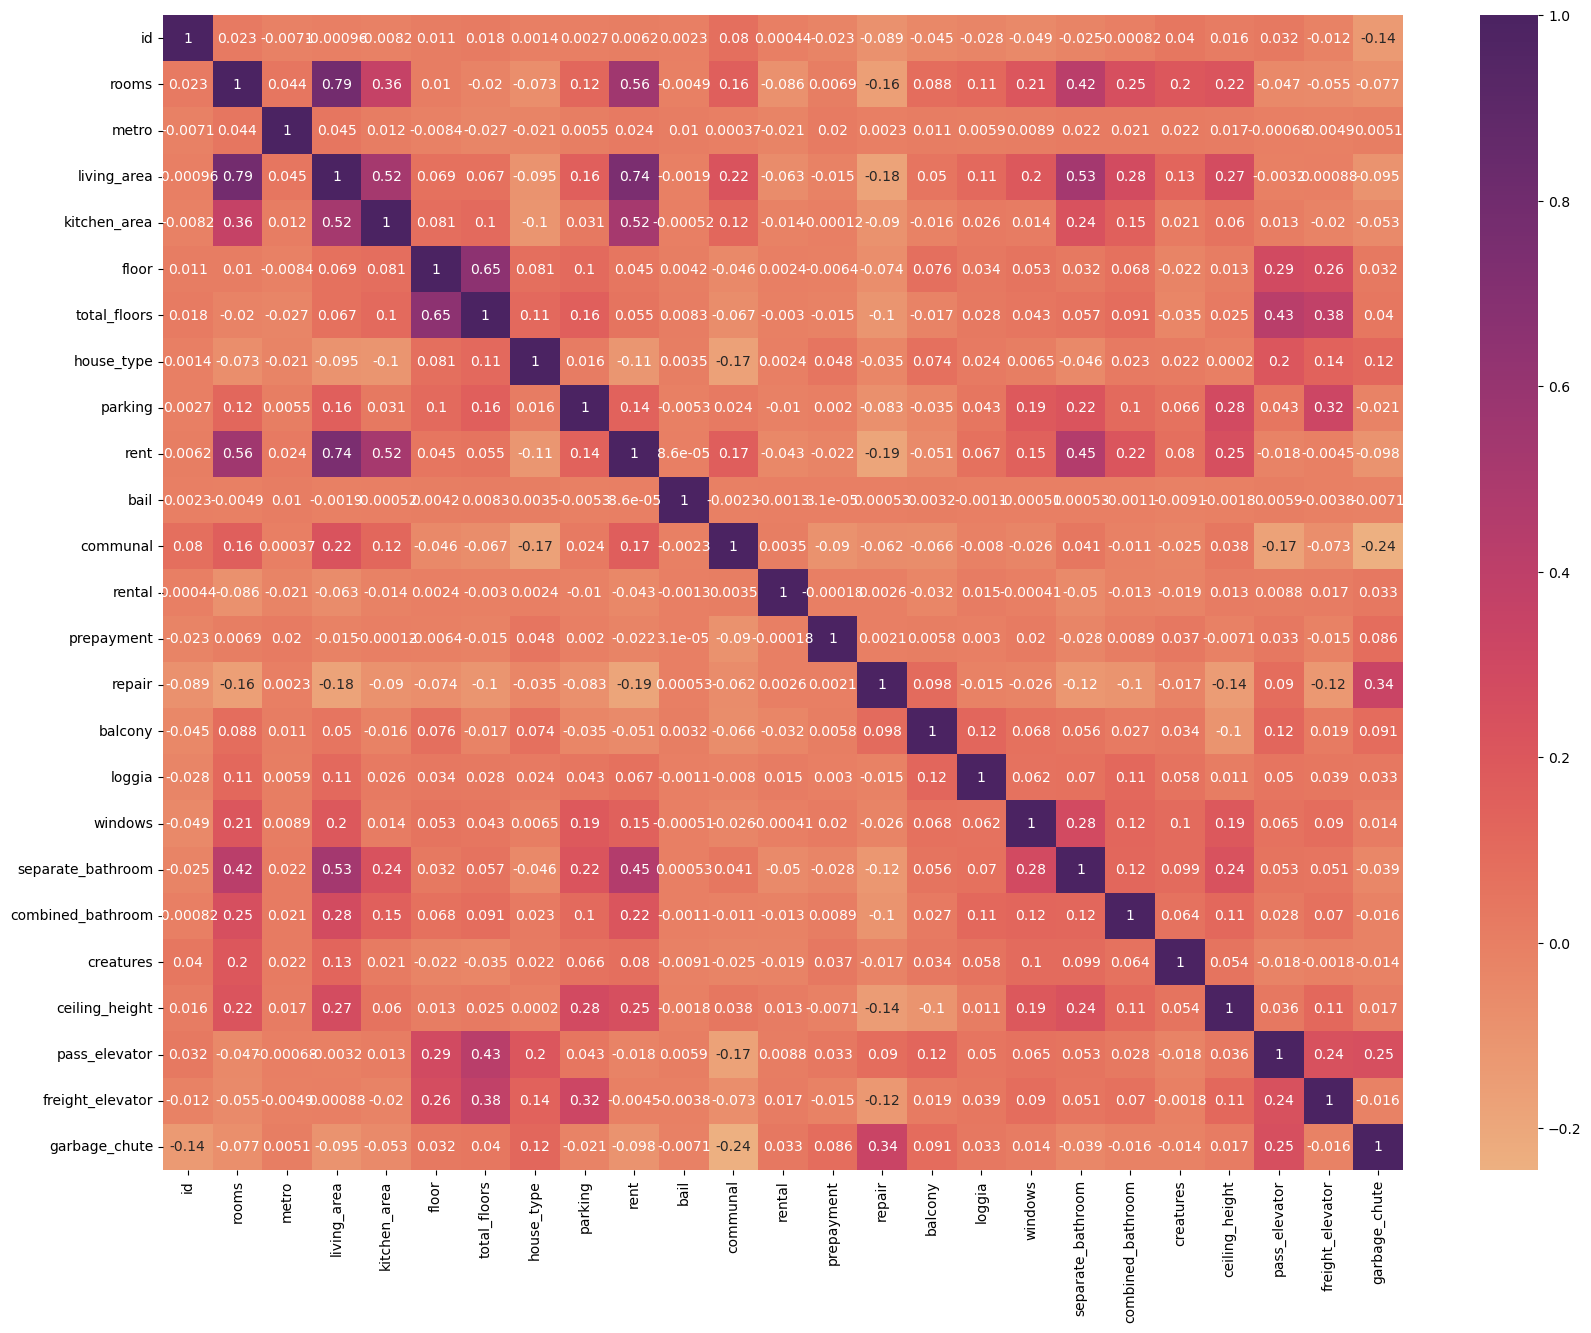

In [41]:
plt.figure(figsize=(20, 15))
# df_code.drop('Unnamed: 0',  axis=1, inplace=True)
df_corr = df_code.corr(method = 'pearson', numeric_only = True)
sns.heatmap(df_corr, annot = True, cmap = 'flare');

Наблюдаем корреляционные связи между различными фичами. 
К нашему удивлению видим корреляцию между видом с окна и раздельным туалетом(?), 
а так же у раздельного сан узла высокая корреляция между общей площадью, стоимостью и количеством комнат.

В остальном те связи которые мы предпологали частично оправдались, например заметна связь 
между количеством этажей и лифтами, 
между стоимостью аренды и общей жилой площадью,
между команатми и общей площадью и.т.д.


# Релиз 3.0. Выводы.
- Проведена кодировка
- Удалены дубликаты объявлений
- Оформлена аналитика финальных данных

In [42]:
subwaydf.to_csv('pandas_data.csv', index=False)